Задание №4. Команда 5. Цыпленков А.В. 
06.11.2018

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [ ]:
from pandas import read_csv, DataFrame, Series

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

label_encoder = LabelEncoder()

In [ ]:
from bs4 import BeautifulSoup # Превращалка html в текст.
import re # Регулярные выражения.

In [ ]:
from collections import Counter

import codecs # Чтобы не было проблем с кодировками.

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [92]:
df_test = pd.read_csv('C:/Users/lords\Downloads/SkillFactory/HW_lesson_05/HomeTask_05/test.csv', sep='\t', encoding='utf8')
df_train = pd.read_csv('C:/Users/lords\Downloads/SkillFactory/HW_lesson_05/HomeTask_05/train.csv', sep='\t', encoding='utf8')

In [93]:
df_smpl = pd.read_csv('C:/Users/lords\Downloads/SkillFactory/HW_lesson_05/HomeTask_05/sampleSubmission.csv', sep='\,', encoding='utf8')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.info()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import pymorphy2

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.decomposition import PCA

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression  # импортируем модель машинного обучения
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation, svm

In [ ]:
#df_train.description.values

In [ ]:
def f_tokenizer(s):
    morph = pymorphy2.MorphAnalyzer()
    if type(s) == 'unicode':
        t = s.split(' ')
    else:
        t = s
    f = []
    for j in t:
        m = morph.parse(j.replace('.',''))
        if len(m) != 0:
            wrd = m[0]
            if wrd.tag.POS not in ('NUMR','PREP','CONJ','PRCL','INTJ'):
                f.append(wrd.normal_form)
    return f

In [ ]:
#coder = HashingVectorizer(tokenizer = f_tokenizer, n_features = 100)

In [ ]:
#df_train.description.map(f_tokenizer)

In [ ]:
#trainNotDuble = df_train.drop_duplicates()
#trn = coder.fit_transform(trainNotDuble.description.tolist()).toarray()

In [ ]:
df_test.head()

In [ ]:
_df_train = df_train.copy()

In [ ]:
#_df_train['ndecsr'] = _df_train['name'] + ': ' + _df_train['description']
#_df_train['ndecsr'] = _df_train['description']

In [ ]:
#print(_df_train.description.values)

In [ ]:
# _df_train.ndecsr = _df_train.ndecsr.str.lower()
# _df_train.ndecsr = _df_train.ndecsr.str.replace(u' - ?', u'-')
# _df_train.ndecsr = _df_train.ndecsr.str.replace(u'[^а-я -]','')
# _df_train.ndecsr = _df_train.ndecsr.str.replace(u'- ',' ')
# _df_train.ndecsr = _df_train.ndecsr.str.replace(u'  *',' ')

_df_train.description = _df_train.description.str.lower()
_df_train.description = _df_train.description.str.replace(u' - ?', u'-')
_df_train.description = _df_train.description.str.replace(u'[^а-я -]','')
_df_train.description = _df_train.description.str.replace(u'- ',' ')
_df_train.description = _df_train.description.str.replace(u'  *',' ')

In [97]:
df_train.description.tolist()

['<p><strong>В НОВЫЙ МАГАЗИН YORK (хозтовары) приглашаем на постоянную работу руководителя секции (хозтовары).</strong></p> <p><strong>Обязанности: </strong></p> <p> </p> <ul> <li>организация эффективного и культурного обслуживания покупателей</li> <li>организация приемки-сдачи товаров на склад</li> <li>консультация покупателей по вопросам, касающимся оказываемых услуг</li> <li>контроль своевременной подачи товаров в торговую секцию</li> <li>проверка качества, сроков годности ТМЦ, наличие маркировок, ценников на товарах</li> <li>организация бесперебойной работы товарной секции и участка склада, закрепленного за ней</li> <li>контроль за сохранностью товаров, торгового оборудования и прочих материальных ценностей</li> <li>инвентаризация товаров</li> </ul> <p> </p> <p><strong>Требования:</strong></p> <ul> <li>знание товарной группы</li> <li>знание правил приемки товара</li> <li>опыт работы в розничной торговле в качестве продавца 6 р. / заместителя заведующего секцией/отделом</li> <li>отв

In [98]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), token_pattern=r'[А-Яа-яЁё]+\-[А-Яа-яЁё]+|[А-Яа-яЁё]+', max_features = 9000)

#vectorizer = CountVectorizer(max_features = 5000)
#vectorizer = HashingVectorizer(n_features=10000)

X = vectorizer.fit_transform(df_train.description.tolist())

In [99]:
Y = df_train.target

In [101]:
TRNtrain, TRNtest, TARtrain, TARtest = train_test_split(X, Y, test_size=0.33) #random_state=42

In [127]:
model_rfc = RandomForestClassifier(n_estimators = 90) #в параметре передаем кол-во деревьев max_depth = 12
model_knc = KNeighborsClassifier(n_neighbors = 12) #в параметре передаем кол-во соседей
model_lr = LogisticRegression() #penalty='l1', tol = 0.01
model_tree = DecisionTreeClassifier(max_depth = 6)
model_svc = svm.SVC() #по умолчанию kernek='rbf'

In [33]:
itog_val = {}
kfold = 5

In [40]:
scores = cross_validation.cross_val_score(model_rfc, X, Y, cv = kfold)
itog_val['RandomForestClassifier'] = scores.mean()

scores = cross_validation.cross_val_score(model_lr, X, Y, cv = kfold)
itog_val['LogisticRegression'] = scores.mean()

scores = cross_validation.cross_val_score(model_tree, X, Y, cv = kfold)
itog_val['DecisionTreeClassifier'] = scores.mean()

#scores = cross_validation.cross_val_score(model_svc, X, Y, cv = kfold)
#itog_val['SVC'] = scores.mean()

In [45]:
# scores = cross_validation.cross_val_score(model_knc, X, Y, cv = kfold)
# itog_val['KNeighborsClassifier'] = scores.mean()

In [41]:
itog_val

{'DecisionTreeClassifier': 0.8757350155936532,
 'RandomForestClassifier': 0.919115024354153,
 'LogisticRegression': 0.9503500124875437}

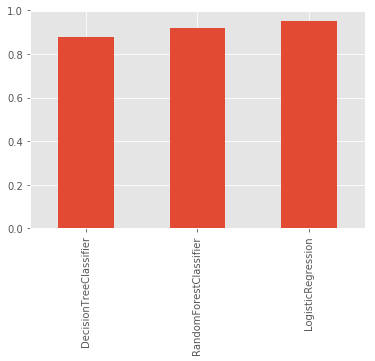

In [46]:
DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

In [ ]:
#model = RandomForestClassifier(n_estimators = 70, max_depth = 6) # max_depth = 3

In [ ]:
# model = RandomForestClassifier()
# cross_val_score(
#     model,
#     X,
#     Y,
#     scoring='roc_auc',
#     cv=10
# )

In [116]:
model_rfc.fit(TRNtrain, TARtrain)
predict_rfc = model_rfc.predict(TRNtest)
predict_proba_rfc = model_rfc.predict_proba(TRNtest)

In [128]:
model_lr.fit(TRNtrain, TARtrain)
predict_lr = model_lr.predict(TRNtest)
predict_proba_lr = model_lr.predict_proba(TRNtest)

In [108]:
model_tree.fit(TRNtrain, TARtrain)
predict_tree = model_tree.predict(TRNtest)
predict_proba_tree = model_tree.predict_proba(TRNtest)

In [ ]:
# print('precision', precision_score(TARtest, predict))
# print('recall', recall_score(TARtest, predict))
# print('accuracy', accuracy_score(TARtest, predict))
# print('f1', f1_score(TARtest, predict))

(-0.01, 1.01)

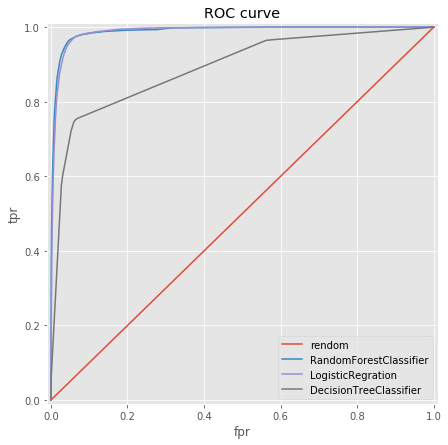

In [129]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(7, 7))
# линия Random
plt.plot([0, 1], [0, 1])

# линия RandomForestClassifier
fpr, tpr, thresholds = roc_curve(TARtest, predict_proba_rfc[:,1])
plt.plot(fpr, tpr)

# линия LogisticRegression
fpr, tpr, thresholds = roc_curve(TARtest, predict_proba_lr[:,1])
plt.plot(fpr, tpr)

# линия DecisionTreeClassifier
fpr, tpr, thresholds = roc_curve(TARtest, predict_proba_tree[:,1])
plt.plot(fpr, tpr)

plt.legend(['rendom', 'RandomForestClassifier', 'LogisticRegration', 'DecisionTreeClassifier'])

plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170179 entries, 0 to 170178
Data columns (total 3 columns):
id             170179 non-null int64
name           170179 non-null object
description    170179 non-null object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [111]:
_df_test = df_test.copy()

In [113]:
_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170179 entries, 0 to 170178
Data columns (total 3 columns):
id             170179 non-null int64
name           170179 non-null object
description    170179 non-null object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [ ]:
#_df_test['ndecsr'] = _df_test['name'] + ': ' + _df_test['description']
#_df_test['ndecsr'] = _df_test['description']

In [81]:
# _df_test.ndecsr = _df_test.ndecsr.str.lower()
# _df_test.ndecsr = _df_test.ndecsr.str.replace(u' - ?', u'-')
# _df_test.ndecsr = _df_test.ndecsr.str.replace(u'[^а-я -]','')
# _df_test.ndecsr = _df_test.ndecsr.str.replace(u'- ',' ')
# _df_test.ndecsr = _df_test.ndecsr.str.replace(u'  *',' ')

_df_test.description = _df_test.description.str.lower()
_df_test.description = _df_test.description.str.replace(u' - ?', u'-')
_df_test.description = _df_test.description.str.replace(u'[^а-я -]','')
_df_test.description = _df_test.description.str.replace(u'- ',' ')
_df_test.description = _df_test.description.str.replace(u'  *',' ')

In [82]:
_df_test.description.count()

170179

In [120]:
#df_test.description.tolist()

In [118]:
X_test = vectorizer.fit_transform(df_test.description.tolist())

In [121]:
tstPredict = model_rfc.predict(X_test)                  # делаем предсказание

tstPredict_proba = model_rfc.predict_proba(X_test)

In [60]:
tstPredict.size

170179

In [122]:
tstPredict_proba[:, 1]

array([0.58414339, 0.70237864, 0.6010467 , ..., 0.34598149, 0.27516982,
       0.15417687])

In [ ]:
#df_smpl['target'] = tstPredict_proba[:, 1]

In [124]:
df_smpl['target'] = tstPredict

In [ ]:
#df_smpl = df_smpl.rename(columns={'id,target': 'id'})

In [125]:
df_smpl.head()

,id,target
0,200000,1
1,200001,1
2,200002,1
3,200003,1
4,200004,0


In [126]:
df_smpl.to_csv('submissio5.csv', index = False)

In [ ]:
type(df_train.id)